# 1. PDF File Preprocessing Pipeline 

## 1.1 Automatic PDF Parsing
Using the Parser module built by ourselves to automatically parse the PDF files

In [1]:
import Parser
import os
import json
import pandas as pd
import numpy as np
import re

In [2]:
# input the path of the reports folder
# parent_path = '/project/Reports/Annual_Reports_copy' 
# all_path = os.listdir(parent_path)
# pdf_list = [file for file in all_path if file[-3:]=='pdf']

In [12]:
# Parse the PDF files and write page contents into text files
# %%time #Only run this once to avoid long running time
# os.chdir(parent_path)
# for file_path in pdf_list:
#     Parser.pdfparser(file_path,delete_existing=True)

In [13]:
#dump all text files into a JSON file
# os.chdir(parent_path)
# all_text=[]
# txt_list = [file for file in all_path if file[-3:]=='txt']
# for file_path in txt_list:
#     all_text.append(Parser.text_to_dict(file_path))
# with open("raw_text_all.json","w") as f:
#     json.dump(all_text,f)

In [15]:
# #New annual report updates
# parent_path = '/project/Reports/Updates' 
# all_path = os.listdir(parent_path)
# pdf_list = [file for file in all_path if file[-3:]=='pdf']
# os.chdir(parent_path)
# for file_path in pdf_list:
#     Parser.pdfparser(file_path,delete_existing=True)
# os.chdir(parent_path)
# all_path = os.listdir(parent_path)
# all_text=[]
# txt_list = [file for file in all_path if file[-3:]=='txt']
# print(len(txt_list))
# for file_path in txt_list:
#     all_text.append(Parser.text_to_dict(file_path))
# import json
# with open("raw_text_all.json","w") as f:
#     json.dump(all_text,f)

In [53]:
#Other reports update
# parent_path = '/project/Reports/Other_Reports' 
# all_path = os.listdir(parent_path)
# pdf_list = [file for file in all_path if file[-3:]=='pdf']
# os.chdir(parent_path)
# for file_path in pdf_list:
#     Parser.pdfparser(file_path,delete_existing=True)
# import json    
# all_path = os.listdir(parent_path)
# all_text=[]
# txt_list = [file for file in all_path if file[-3:]=='txt']
# print(len(txt_list))
# for file_path in txt_list:
#     all_text.append(Parser.text_to_dict(file_path))
# with open("raw_text_all.json","w") as f:
#     json.dump(all_text,f)

2020-08-07 13:10:12,652 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-08-07 13:10:13,132 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-08-07 13:10:13,547 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


parsing text-formatted pdf file
parsing finished:HSBC_Holdings_Plc_ESG_Report_2018
parsing text-formatted pdf file
parsing finished:HSBC_Holdings_Plc_ESG_Report_b_2017
parsing text-formatted pdf file
parsing finished:QBE_Insurance_Group Ltd_Sustainability_Report_2018
parsing text-formatted pdf file
parsing finished:Aviva_Plc_Climate_Report_2018
parsing text-formatted pdf file
parsing finished:Allianz_Group_Sustainability_Report_2018
parsing text-formatted pdf file
parsing finished:Aviva_Plc_Response_to_Climate_Change_2016
parsing text-formatted pdf file
parsing finished:Lloyds_Banking_Group_ESG_Report_2019
parsing text-formatted pdf file
parsing finished:Aviva_Plc_CRS_Report_2017
parsing text-formatted pdf file
parsing finished:AXA_Group_Integrated_Report_2017
parsing text-formatted pdf file
parsing finished:Barclays_Plc_ESG_Report_2016
parsing text-formatted pdf file
parsing finished:Lloyds_Banking_Group_ESG_Report_2018a
parsing text-formatted pdf file
parsing finished:Aviva_Plc_CR_Da

NameError: name 'json' is not defined

## 1.2 Table of Contents (TOC) Parsing

### 1.2.1 Read JOSN file into Pandas Dataframe

In [3]:
#main folder
parent_path = '/project/Reports/Annual_Reports_copy' 
os.chdir(parent_path)
df = pd.read_json('raw_text_all.json','records')
df['row']=df.index
df['total_page'] = df.raw_text.apply(lambda x: len(x))

df['firm_name'] = df.file_name.apply(lambda x:
                               re.findall(r'.+(?=_Annual_Report)',x)[0])
df['year'] = df.file_name.apply(lambda x:
                         re.findall(r'.{4}(?=_text)',x)[0])

In [4]:
#updates folder:Annual Report
parent_path = '/project/Reports/Updates' 
os.chdir(parent_path)
df_update = pd.read_json('raw_text_all.json','records')
df_update['row']=df_update.index
df_update['total_page'] = df_update.raw_text.apply(lambda x: len(x))
df_update['firm_name'] = df_update.file_name.apply(lambda x:
                               re.findall(r'.+(?=_Annual_Report)',x)[0])
df_update['year'] = df_update.file_name.apply(lambda x:
                         re.findall(r'.{4}(?=_text)',x)[0])

In [5]:
# Update df with df_update (must reset column row with new index)
df_new = df[~df['file_name'].isin(df_update['file_name'])].copy()
df_new = pd.concat([df_new,df_update],ignore_index=True,sort=False)
df_new['row'] = df_new.index 

In [6]:
#other reports folder
parent_path = '/project/Reports/Other_Reports' 
os.chdir(parent_path)
df_other = pd.read_json('raw_text_all.json','records')
df_other['row']=df_other.index
df_other['total_page'] = df_other.raw_text.apply(lambda x: len(x))
regex_firm = r'''.+(?=_Climate|_Sustainability|_CR|_Programme|_Response|
_sSociety|_Responsible|_ESG|_Environment|_Integrated|_Emission|_Our|_CSR|_Corporate)'''
df_other['firm_name'] = df_other.file_name.apply(lambda x:
                               re.findall(regex_firm,x)[0] if len(re.findall(regex_firm,x))>0 else np.nan)
df_other['year'] = df_other.file_name.apply(lambda x:
                         re.findall(r'.{4}(?=_text)',x)[0])

### 1.2.2 Expand Page List 

In [7]:
#split them into pages
df_other_expanded = Parser.expand_pagelist(df_other) # do not generate toc for other reports
df_expanded = Parser.expand_pagelist(df_new)
df_expanded = Parser.extract_potential_header(df_expanded)
#each row of the dataframe now contains only the information of one page


### 1.2.3 Locate TOC Page for Each Report

In [10]:
# read the gold standard headings and locate toc page
standard_header = Parser.header_preprocessor('/project/Data/headers.xlsx')
df_toc = Parser.find_toc_page(df_expanded,standard_header)

In [11]:
#if the final decision is nan, allow manual check and modification of the result
for index,row in df_toc[pd.isna(df_toc['toc_page'])].iterrows():
    print(index)
    manual_check = input('Please input where the Table of Content occurs, if no Table of Content exits press Enter directly:')
    try:
        df_toc.loc[index,'toc_page'] = int(manual_check)
    except:
        pass

Allianz_Insurance_Plc_Annual_Report_2017_text
Please input where the Table of Content occurs, if no Table of Content exits press Enter directly:
Allianz_Insurance_Plc_Annual_Report_2018_text
Please input where the Table of Content occurs, if no Table of Content exits press Enter directly:
Allianz_Insurance_Plc_Annual_Report_2016_text
Please input where the Table of Content occurs, if no Table of Content exits press Enter directly:
Allianz_Insurance_Plc_Annual_Report_2019_text
Please input where the Table of Content occurs, if no Table of Content exits press Enter directly:


### 1.2.4 Automatically Generate New Table of Contents (as Dictionaries) for Reports Using Different Method and Automatically Select the Best Result

In [12]:
%%time
df_toc_final = Parser.auto_parser_matcher(df_expanded,df_toc,standard_header)

CPU times: user 3min 8s, sys: 44 ms, total: 3min 8s
Wall time: 3min 11s


### 1.2.5 Examples of Manual Editing

In [13]:
#1 change the whole toc manually directly
file_name =  'Allianz_Insurance_Plc_Annual_Report_2017_text'
dict_ = {2:(2,'strategic report'),6:(6,'directors report'),
       7:(7,'statement of directors responsibilities'),
       8:(8,'independent auditors report'),
       13:(13,'financial statements'),
       17:(17,'notes to financial statement'),
       39:(39,'risk related disclosure'),
       47:(47,'others')}

df_toc_final = Parser.manual_editor(df_expanded,df_toc_final,file_name,standard_header,parser_auto=dict_) 

In [14]:
#1 change the whole toc manually directly
file_name =  'Allianz_Insurance_Plc_Annual_Report_2016_text'
dict_ = {2:(2,'strategic report'),6:(6,'directors report'),
       7:(7,'statement of directors responsibilities'),
       8:(8,'Independent auditors report'),
       10:(10,'financial statements'),
       13:(13,'notes to financial statement'),
       35:(35,'risk related disclosure'),
       43:(43,'others')}

df_toc_final = Parser.manual_editor(df_expanded,df_toc_final,file_name,standard_header,parser_auto=dict_) 

In [15]:
file_name = 'Allianz_Insurance_Plc_Annual_Report_2018_text'
dict_ = {2:(2,'strategic report'),6:(6,'directors report'),
        7:(7,'statement of directors responsibilities'),
        8:(8,'Independent auditors report'),
        13:(13,'financial statements'),
        17:(17,'notes to financial statement'),
        40:(40,'risk related disclosure'),
        50:(50,'others')}
df_toc_final = Parser.manual_editor(df_expanded,df_toc_final,file_name,standard_header,parser_auto=dict_) 

In [16]:
#1 change the whole toc manually directly
file_name =  'Allianz_Insurance_Plc_Annual_Report_2019_text'
dict_ = {2:(2,'strategic report'),7:(7,'directors report'),
       13:(13,'statement of directors responsibilities'),
       14:(14,'independent auditors report'),
       20:(20,'financial statements'),
       24:(24,'notes to financial statement')}

df_toc_final = Parser.manual_editor(df_expanded,df_toc_final,file_name,standard_header,parser_auto=dict_) 

In [17]:
file_name = 'Standard_Chartered_Plc_Annual_Report_2016_text'
dict_ = {4:(2,'group at a glance'),6:(4,'chairmans statement'),
        8:(6,'economic environment'),10:(8,'business model'),
        12:(10,'how we do business'),14:(12,'group chief executives review'),
        16:(14,'our strategy'),20:(18,'key performance indicators'),
        23:(21,'group chief risk officers review'),26:(24,'group chief financial officers review'),
        32:(30,'client segement reviews'),46:(44,'regional reviews'),
        56:(54,'directors report'),134:(132,'risk review and capital review'),
        192:(190,'financial statements and notes'),296:(294,'supplementary information')}
df_toc_final = Parser.manual_editor(df_expanded,df_toc_final,file_name,standard_header,parser_auto=dict_) 

In [18]:
# example only: change the parser mode and matcher mode for image pdf
# file_name = 'Liverpool_Victoria_Insurance_Company_Ltd_Annual_Report_2017_text'
# df_toc_final2 = Parser.manual_editor(df_expanded,df_toc_final,file_name,standard_header,parser='str',matcher='loose')

In [22]:
#Export 10 files to validate the parsing outcome
# df_val = df_toc_final['indexed_page_dict'].copy().sample(10)
# df_val.to_excel('/project/Data/toc_validation.xlsx',encoding='utf-8')

### 1.2.6 Assign Headings to Each Page by New TOC Dictionaries

In [25]:
df_expanded['header'] = df_expanded.apply(lambda x: 
                                          Parser.retrieve_header(x.file_name,
                                                          x.page_number,
                                                         x.total_page,
                                                         df_toc_final),axis=1 )

In [26]:
df_sections = df_expanded.loc[:,['file_name','firm_name','year','source_type',
                                 'total_page','page_number','raw_text','header']].copy()

## 1.3 Modify File Names and Check the Number of Samples 

In [27]:
#added on 0820 check the number of samples included
regex_firm = r'''.+(?=_Annual|_Climate|_Sustainability|_CR|_Programme|_Response|_sSociety|_Responsible|_ESG|_Environment|_Integrated|_Emission|_Our|_CSR|_Corporate)'''
df_sections['firm_name'] = df_sections.file_name.apply(lambda x:
                               re.findall(regex_firm,x)[0] if len(re.findall(regex_firm,x))>0 else np.nan)

df_sections['year'] = df_sections.file_name.apply(lambda x:
                         re.findall(r'\d{4}(?=[a-z]{0,1}_text)',x)[0])
df_sections.loc[df_sections['firm_name']=='QBE_Insurance_Group Ltd',
                         'firm_name'] = 'QBE_Insurance_Group'
df_sections.loc[df_sections['firm_name']=='QBE_Our_Approachto',
                         'firm_name'] = 'QBE_Insurance_Group'
df_sections.loc[df_sections['firm_name']=='Aviva_Plc_Programme_Response',
                         'firm_name'] = 'Aviva_Plc'
df_sections.loc[df_sections['firm_name']=='Aviva_Plc_Response_to',
                         'firm_name'] = 'Aviva_Plc'
banking = ['Barclays_Plc', 'HSBC_Holdings_Plc', 
           'Lloyds_Banking_Group', 'Standard_Chartered_Plc', 'Nationwide_Building_Society', 
           'Santander_UK_Group_Holdings_Plc', 'Virgin_Money_Plc',
           'Royal_Bank_of_Scotland_Group_Plc', 'Yorkshire_Building_Society',
           'Coventry_Building_Society']  
insuarance = ['Aviva_International_Ltd', 'Aviva_Insurance_Ltd',
              'AIG_Europe_Ltd', 'Royal_&_Sun_Alliance_Insurance_Plc',
              'Direct_Line_Group', 'Chubb_European_Group_Ltd',
              'Bupa_Insurance_Ltd', 'Axa_Insurance_UK_Plc',
              'Allianz_Insurance_Plc', 'XL_Catlin',
              'Axa_PPP_Healthcare_Ltd', 'Ageas_Insurance_Ltd', 
              'QBE_Insurance', 'NFU_Mutual', 
              'Liverpool_Victoria_Insurance_Company_Ltd', 'Aspen_Insurance_UK_Ltd', 
              'British_Gas_Insurance_Ltd', 'Liberty_Mutual_Insurance_Europe_Ltd',
              'Chubb_Insurance_Company_of_Europe', 'Covea_Insurance_Plc']
df_sections['from_firm_list'] = df_sections.firm_name.apply(lambda x: 1 if x in banking+insuarance else 0)
df_sections['Sector'] = df_sections.firm_name.apply(lambda x: 'Banking' if x in banking else "Insurance")

In [28]:
df_other_expanded['firm_name'] = df_other_expanded.file_name.apply(lambda x:
                               re.findall(regex_firm,x)[0] if len(re.findall(regex_firm,x))>0 else np.nan)

df_other_expanded['year'] = df_other_expanded.file_name.apply(lambda x:
                         re.findall(r'\d{4}(?=[a-z]{0,1}_text)',x)[0])
df_other_expanded.loc[df_other_expanded['firm_name']=='QBE_Insurance_Group Ltd',
                         'firm_name'] = 'QBE_Insurance_Group'
df_other_expanded.loc[df_other_expanded['firm_name']=='QBE_Our_Approachto',
                         'firm_name'] = 'QBE_Insurance_Group'
df_other_expanded.loc[df_other_expanded['firm_name']=='Aviva_Plc_Programme_Response',
                         'firm_name'] = 'Aviva_Plc'
df_other_expanded.loc[df_other_expanded['firm_name']=='Aviva_Plc_Response_to',
                         'firm_name'] = 'Aviva_Plc'
df_other_expanded['from_firm_list'] = df_other_expanded.firm_name.apply(lambda x: 1 if x in banking+insuarance else 0)
df_other_expanded['Sector'] = df_other_expanded.firm_name.apply(lambda x: 'Banking' if x in banking else "Insurance")

In [25]:
tmp1 = df_sections[df_sections['from_firm_list']==1].drop_duplicates(subset=['file_name'])
tmp2 = df_other_expanded[df_other_expanded['from_firm_list']==1].drop_duplicates(subset=['file_name'])

In [26]:
tmp1.shape

(109, 10)

In [27]:
tmp2.shape

(30, 10)

In [42]:
tmp1.drop_duplicates(subset=['firm_name']).shape

(29, 12)

In [39]:
df_other_expanded = df_other_expanded[df_other_expanded['from_firm_list']==1]

# 2. Sample Selection

## 2.1 Text Pre-processing

In [40]:
# combined annual reports and other reports together
df_sections['report_type'] = 'Annual'
df_other_expanded['report_type'] = 'Other'
df_all = pd.concat([df_sections,df_other_expanded],join='outer',ignore_index=True)

In [42]:
df_all['text_only'] = df_all.raw_text.apply(lambda x: re.sub('[^a-zA-Z ]',' ',x))

In [43]:
import spacy
import re
from joblib import Parallel, delayed

In [44]:
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    import spacy.cli 
    print("Model not found. Downloading.")
    spacy.cli.download("en_core_web_md")
    import en_core_web_md
    nlp = en_core_web_md.load()
    
nlp = spacy.load('en_core_web_md', disable=['tagger', 'parser', 'ner'])

Model not found. Downloading.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [45]:
all_stopwords = nlp.Defaults.stop_words

In [46]:
# joblib pipeline to speed up tokenisation, lemmetisation and removing stopwords 
def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.text.lower() not in all_stopwords]

    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe
def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk) # the operation piece
    tasks = (do(chunk) for chunk in chunker(texts, len(texts), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [47]:
#generate lemmetised tokens
df_all['tokens'] = preprocess_parallel(df_all['text_only'], chunksize=100)
df_all['tokens'] = df_all.tokens.apply(lambda x: [ tok for tok in x if len(tok.replace(' ',''))>2])

In [49]:
df_all['num_of_words'] = df_all.tokens.apply(lambda x: len(x))

## 2.2 Explorstory Analysis 

In [50]:
climate_keywords = ['biodiversity','carbon','climate','ecology',
               'environment','emission','pollution','sustainable',
              'environmental','esg','tcfd','sustainability','green']

In [52]:
search_string = r'|'.join(climate_keywords)
df_all['keyword_count_string'] = df_all.raw_text.apply(lambda x: len(re.findall(search_string,x.lower())))

In [65]:
df_all['contains_kw'] = 0
df_all.loc[df_all['keyword_count_string']>0,'contains_kw'] = 1

In [58]:
df_all['ratio_climate_kw'] = df_all['keyword_count_string']/df_all['num_of_words']

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 
%matplotlib inline

In [112]:
annual = (df_all['report_type'] == 'Annual')
other = (df_all['report_type'] == 'Other')
climate = (df_all['contains_kw']==1)

### 2.2.1 Number of Pages in Different Types of Report

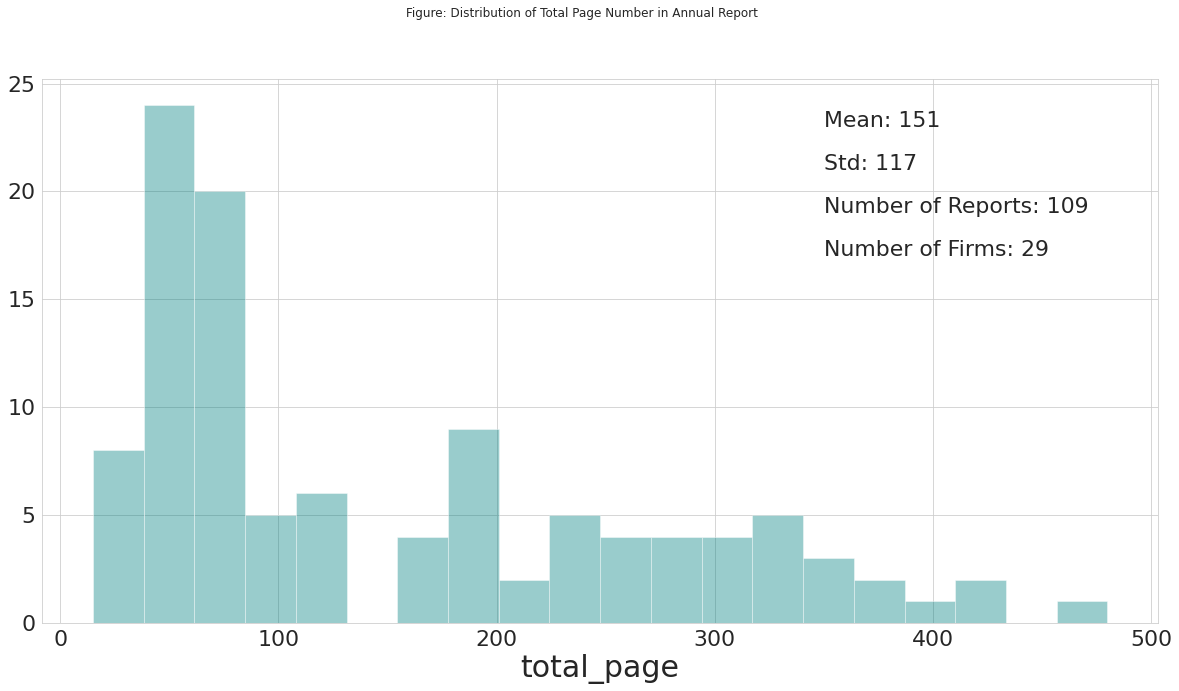

In [176]:
page_a = df_all.loc[annual,['file_name','total_page','firm_name']].drop_duplicates(subset=['file_name'])
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(page_a.total_page,bins=20,kde=False, color="Teal")
ax.text(350,23,
        'Mean: {:1.0f}'.format(page_a.total_page.mean()),
       fontsize=22)
ax.text(350,21,
        'Std: {:1.0f}'.format(page_a.total_page.std()),
       fontsize=22)
ax.text(350,19,
        'Number of Reports: {:1.0f}'.format(page_a.shape[0]),
       fontsize=22)
ax.text(350,17,
        'Number of Firms: {:1.0f}'.format(len(page_a['firm_name'].unique())),
       fontsize=22)
fig.suptitle('Figure: Distribution of Total Page Number in Annual Report')
plt.rc('axes', titlesize=22)
plt.rc('ytick', labelsize=22)
plt.rc('xtick', labelsize=22)

plt.show()

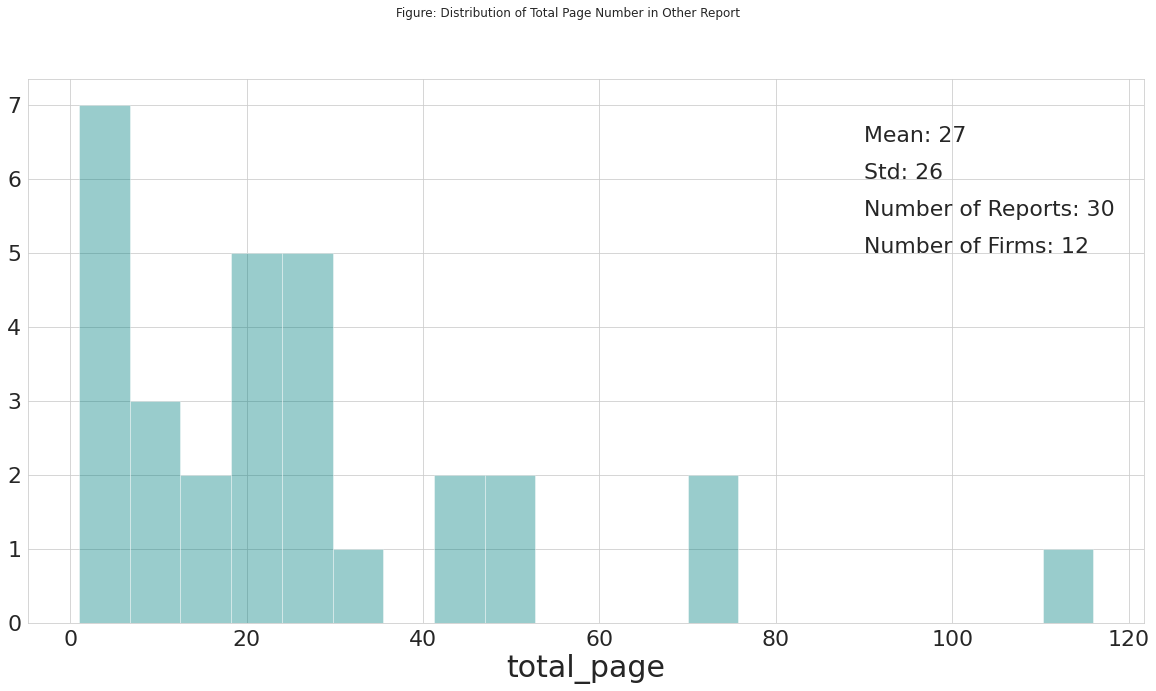

In [175]:
page_b = df_all.loc[other,['file_name','total_page','firm_name']].drop_duplicates(subset=['file_name'])
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(page_b.total_page,bins=20,kde=False, color="Teal")
ax.text(90,6.5,
        'Mean: {:1.0f}'.format(page_b.total_page.mean()),
       fontsize=22)
ax.text(90,6.0,
        'Std: {:1.0f}'.format(page_b.total_page.std()),
       fontsize=22)
ax.text(90,5.5,
        'Number of Reports: {:1.0f}'.format(page_b.shape[0]),
       fontsize=22)
ax.text(90,5,
        'Number of Firms: {:1.0f}'.format(len(page_b['firm_name'].unique())),
       fontsize=22)
fig.suptitle('Figure: Distribution of Total Page Number in Other Report')
plt.rc('axes', titlesize=22)
plt.rc('ytick', labelsize=22)
plt.rc('xtick', labelsize=22)

plt.show()

### 2.2.2 Compare total page number with number of page that contains climate kw

In [160]:
# Compare total page number with number of page that contains climate kw
df_page_compare = pd.DataFrame(columns=['Report Type','Climate','Page Counts'])
page_a = df_all.loc[annual&climate,['total_page','file_name']].groupby(['file_name']).count()
df_page_compare = df_page_compare.append({'Report Type':'Annual Report',
                                         'Climate':'Contains Climate-related Keywords',
                                          'Page Counts':page_a.total_page.sum()},ignore_index=True )
page_b = df_all.loc[other&climate,['total_page','file_name']].groupby(['file_name']).count()
df_page_compare = df_page_compare.append({'Report Type':'Other Report',
                                         'Climate':'Contains Climate-related Keywords',
                                          'Page Counts':page_b.total_page.sum()},ignore_index=True)

In [161]:
page_a = df_all.loc[annual,['file_name','total_page','firm_name']].drop_duplicates(subset=['file_name'])
df_page_compare = df_page_compare.append({'Report Type':'Annual Report',
                                         'Climate':'All',
                                          'Page Counts':page_a.total_page.sum()},ignore_index=True)
page_b = df_all.loc[other,['file_name','total_page','firm_name']].drop_duplicates(subset=['file_name'])
df_page_compare = df_page_compare.append({'Report Type':'Other Report',
                                         'Climate':'All',
                                          'Page Counts':page_b.total_page.sum()},ignore_index=True)

In [164]:
df_page_compare.rename(columns={'Climate':'Page Type'},inplace=True)

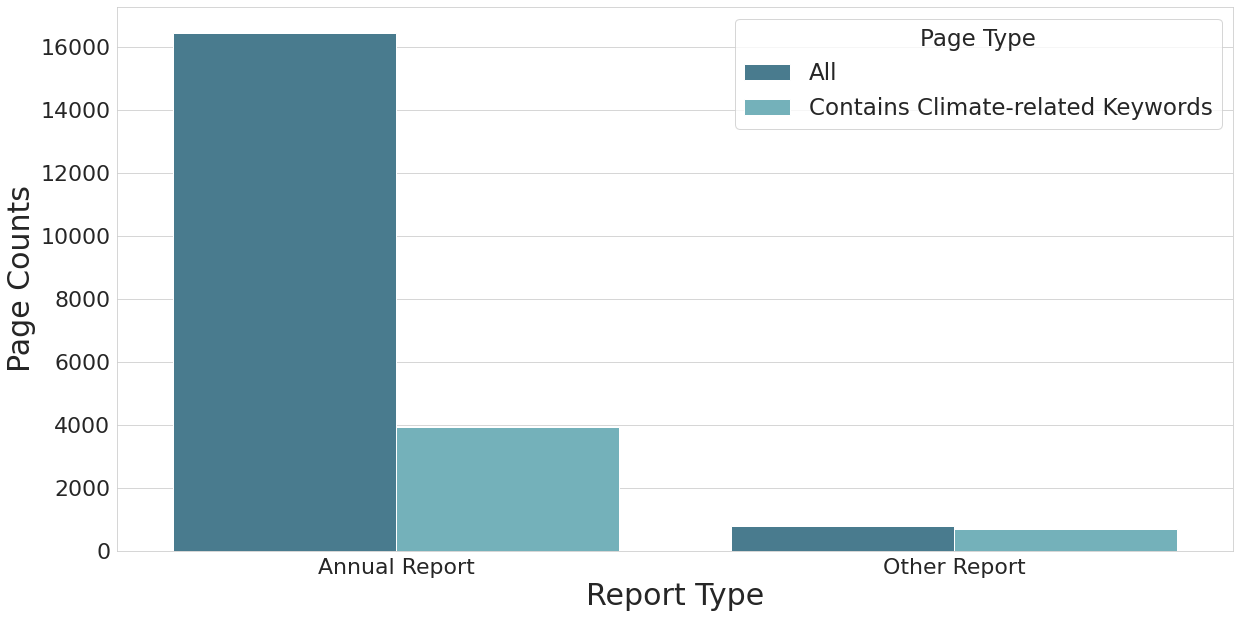

In [168]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Report Type',y='Page Counts',hue_order=['All','Contains Climate-related Keywords'],
            data=df_page_compare,hue='Page Type',palette = 'GnBu_d' )
plt.rc('legend',fontsize=22)
plt.rc('legend',title_fontsize=22)
plt.show()

### 2.2.3 Distribution of Number of Keywords on Each Page

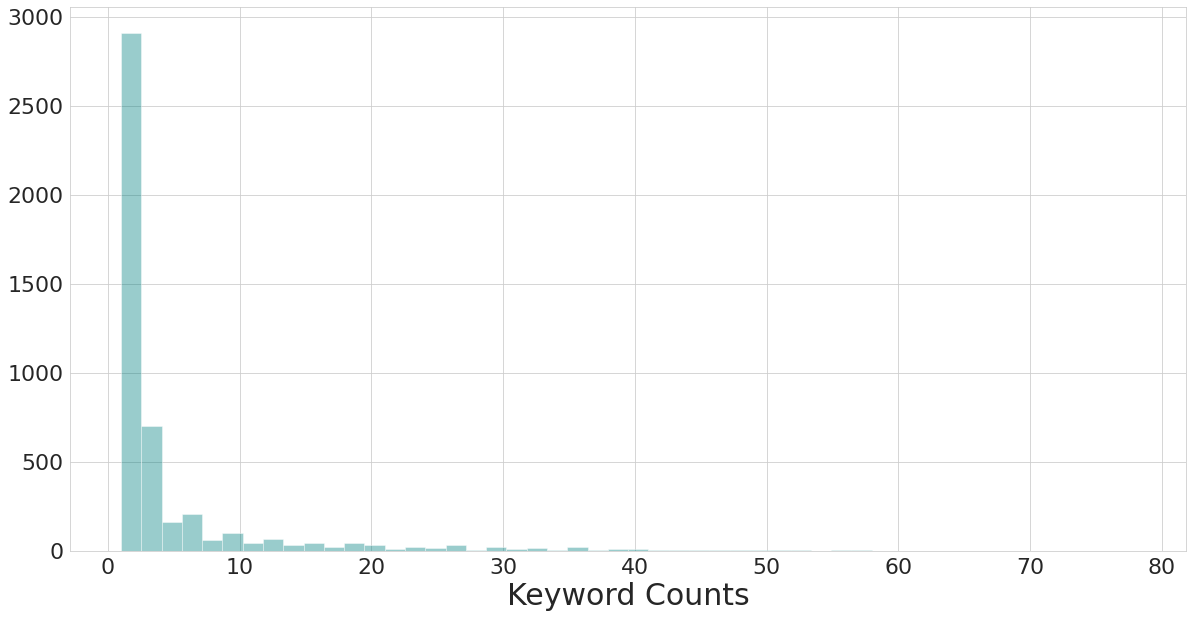

In [180]:
kw = df_all.loc[df_all['contains_kw']>0,'keyword_count_string'].copy()
kw.rename('Keyword Counts',inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(kw,bins=50,kde=False, color="Teal")
plt.rc('axes', titlesize=22)
plt.rc('ytick', labelsize=22)
plt.rc('xtick', labelsize=22)

plt.show()

## 2.3 Retain Only the Page that Contains Keywords to Scope down the Search Range for Climate-related Content

In [27]:
climate_keywords = ['biodiversity','carbon','climate','ecology',
               'environment','emission','pollution','sustainable',
              'environmental','esg','tcfd','sustainability','green']

### 2.3.1 Annual Reports

In [28]:
df_sections['raw_text_lower'] = df_sections['raw_text'].str.lower()

In [29]:
search_string = r'|'.join(climate_keywords)
df_sections['keyword_count'] = df_sections.raw_text_lower.apply(lambda x: len(re.findall(search_string,x)))

In [32]:
df_sections.describe() #16457 pages in original annual report

,total_page,page_number,keyword_count
count,16457.000000,16457.000000,16457.000000
mean,241.000486,121.000243,0.810901
std,118.209189,97.458287,3.131511
min,15.000000,1.000000,0.000000
25%,156.000000,39.000000,0.000000
50%,262.000000,96.000000,0.000000
75%,328.000000,185.000000,0.000000
max,480.000000,480.000000,66.000000


In [33]:
#1 select the page where at least one of the keyword occurs #no need to lemmatize first
df_climate = df_sections[df_sections['keyword_count']>0].copy()

In [34]:
df_climate.describe() #3936 #Annual Report

,total_page,page_number,keyword_count
count,3936.000000,3936.000000,3936.000000
mean,266.622205,87.351118,3.390498
std,105.827016,85.133737,5.679916
min,15.000000,2.000000,1.000000
25%,196.000000,24.000000,1.000000
50%,278.000000,62.000000,2.000000
75%,341.000000,124.000000,3.000000
max,480.000000,479.000000,66.000000


In [96]:
# Export to csv files
# df_climate.to_csv('/project/Data/new_climate_page_annual.csv',encoding = 'utf-8')

### 2.3.2 Other Reports

In [97]:
df_other_expanded['raw_text_lower'] = df_other_expanded['raw_text'].str.lower()
search_string = r'|'.join(climate_keywords)
df_other_expanded['keyword_count'] = df_other_expanded.raw_text_lower.apply(lambda x: len(re.findall(search_string,x)))

In [98]:
df_climate2 = df_other_expanded[df_other_expanded['keyword_count']>0].copy()

In [99]:
df_climate2.describe() #1835

,total_page,page_number,keyword_count
count,1835.000000,1835.000000,1835.000000
mean,60.314441,30.605450,12.059946
std,33.431872,25.814416,12.143351
min,1.000000,1.000000,1.000000
25%,28.000000,10.000000,3.000000
50%,64.000000,22.000000,8.000000
75%,90.000000,46.000000,18.000000
max,116.000000,116.000000,78.000000


In [100]:
# df_climate2.to_csv('/project/Data/new_climate_page_other.csv',encoding = 'utf-8')

# 3. Sample Data for Manual Labelling

In [ ]:
# the page that contains at least one of the key word
df_1 = pd.read_csv('/project/Data/new_climate_page_annual.csv',index_col=0,encoding = 'utf-8')
df_2 = pd.read_csv('/project/Data/new_climate_page_other.csv',index_col=0,encoding = 'utf-8')

In [ ]:
df_1['report_type'] = 'Annual'
df_2['report_type'] = 'Other'

In [ ]:
#Combine all dataframe
df_all = pd.concat([df_1,df_2],join='outer',ignore_index=True)

In [ ]:
# modify file names
regex_firm = r'''.+(?=_Annual|_Climate|_Sustainability|_CR|_Programme|_Response|_sSociety|_Responsible|_ESG|_Environment|_Integrated|_Emission|_Our|_CSR|_Corporate)'''
df_all['firm_name'] = df_all.file_name.apply(lambda x:
                               re.findall(regex_firm,x)[0] if len(re.findall(regex_firm,x))>0 else np.nan)

df_all['year'] = df_all.file_name.apply(lambda x:
                         re.findall(r'\d{4}(?=[a-z]{0,1}_text)',x)[0])
df_all.loc[df_all['firm_name']=='QBE_Insurance_Group Ltd',
                         'firm_name'] = 'QBE_Insurance_Group'
df_all.loc[df_all['firm_name']=='QBE_Our_Approachto',
                         'firm_name'] = 'QBE_Insurance_Group'
df_all.loc[df_all['firm_name']=='Aviva_Plc_Programme_Response',
                         'firm_name'] = 'Aviva_Plc'
df_all.loc[df_all['firm_name']=='Aviva_Plc_Response_to',
                         'firm_name'] = 'Aviva_Plc'
banking = ['Barclays_Plc', 'HSBC_Holdings_Plc', 
           'Lloyds_Banking_Group', 'Standard_Chartered_Plc', 'Nationwide_Building_Society', 
           'Santander_UK_Group_Holdings_Plc', 'Virgin_Money_Plc',
           'Royal_Bank_of_Scotland_Group_Plc', 'Yorkshire_Building_Society',
           'Coventry_Building_Society']  
insuarance = ['Aviva_International_Ltd', 'Aviva_Insurance_Ltd',
              'AIG_Europe_Ltd', 'Royal_&_Sun_Alliance_Insurance_Plc',
              'Direct_Line_Group', 'Chubb_European_Group_Ltd',
              'Bupa_Insurance_Ltd', 'Axa_Insurance_UK_Plc',
              'Allianz_Insurance_Plc', 'XL_Catlin',
              'Axa_PPP_Healthcare_Ltd', 'Ageas_Insurance_Ltd', 
              'QBE_Insurance', 'NFU_Mutual', 
              'Liverpool_Victoria_Insurance_Company_Ltd', 'Aspen_Insurance_UK_Ltd', 
              'British_Gas_Insurance_Ltd', 'Liberty_Mutual_Insurance_Europe_Ltd',
              'Chubb_Insurance_Company_of_Europe', 'Covea_Insurance_Plc']
df_all['from_firm_list'] = df_all.firm_name.apply(lambda x: 1 if x in banking+insuarance else 0)
df_all['Sector'] = df_all.firm_name.apply(lambda x: 'Banking' if x in banking else "Insurance")

In [ ]:
# clean text
def clean_text_lower(text):
    #use regular expression to match potential headings/subheading 
    #print(text)
    #1. move incompelete sentences to a single line :
    # substitute all \n{2,} by \n
    regex = '\n{2,}'
    text = re.sub(regex,'\n',text)
    # remove \n if it is followed by a lower case letter
    regex = '\n(?=[a-z])'
    text = re.sub(regex,' ',text)
    # remove two space in a row
    text = re.sub(' {2,}',' ',text)
    return text.lower()

In [ ]:
df_all['raw_text_clean_lower'] = df_all.raw_text.apply(clean_text_lower)
print(df_all[df_all['from_firm_list']==1].shape)

In [ ]:
# remove the page that has only one keyword and contains the following key-phrase
stop_phrase = ['economic environment','operating environment',
               'geopolitical environment','control environment',
               'interest rate environment','changing environment',
               'rate environment','technology environment'
               'risk environment','external environment',
               'internal environment','commercial environment ',
               'market environment','business environment',
               'sustainable value for shareholders','sustainable returns',
               'sustainable dividend',
               'sustainable capital strength',
               'climate of low interest rates',
              ]

In [ ]:
search_string = r'|'.join(stop_phrase)
df_all['stop_phrase_count'] = df_all.raw_text_clean_lower.apply(lambda x: len(re.findall(search_string,x)))
# drop the page whose keyword only contains stop_phrase
df_all_clean = df_all.loc[~(df_all['keyword_count']==df_all['stop_phrase_count']),:].copy()
#select the page where keywords appear at least once
df_all_clean = df_all_clean.loc[df_all['keyword_count']>0,:].copy()
#keep only uk firms
df_all_clean_page = df_all_clean[df_all_clean['from_firm_list']==1].copy() 

In [ ]:
df_all_clean_page['kwc_quan']= pd.qcut(df_all_clean_page['keyword_count'], 2, labels=False)
df_sample1 = df_all_clean_page[df_all_clean_page['kwc_quan']==0].sample(n=100,random_state=0)
df_sample2 = df_all_clean_page[df_all_clean_page['kwc_quan']==1].sample(n=200,random_state=0)#extract more high keyword count samples
df_sample = pd.concat([df_sample1,df_sample2])

In [ ]:
# df_sample.to_excel('/project/Data/0815_page_to_label.xlsx',encoding='utf-8')

In [ ]:
df_all_clean_page.drop(df_sample1.index,inplace=True)
df_all_clean_page.drop(df_sample2.index,inplace=True)
df_sample_test = df_all_clean_page.sample(n=100,random_state=0)

In [ ]:
#df_sample_test.to_excel('/project/Data/0815_page_to_label_test.xlsx',encoding='utf-8')

In [ ]:
# df_all_clean_page.to_excel('/project/Data/0816_page_to_label_predict.xlsx',encoding='utf-8')